<a href="https://colab.research.google.com/github/Testorugo/Exemplo-Data-Warehouse-e-Data-Lake/blob/main/EXEMPLO_DE_DATALAKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

# Verifica se a pasta 'data_lake' existe, se não, cria a pasta
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Define a quantidade de arquivos a serem criados e o número de linhas por arquivo
num_files = 10
num_rows_per_file = 1000

# Lista para armazenar os dataframes e os nomes dos arquivos correspondentes
dfs = []

# Loop para gerar os dataframes e salvá-los como arquivos CSV
for i in range(num_files):
    # Gera dados aleatórios para três colunas
    data = {
        'coluna1' : np.random.randint(0, 100, num_rows_per_file),
        'coluna2' : np.random.randn(num_rows_per_file),
        'coluna3' : np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um dataframe com os dados gerados
    df = pd.DataFrame(data)

    # Define o nome do arquivo com base no índice do loop e salva o dataframe como CSV no diretório especificado sem indexar as linhas
    file_name = f'data_lake/dados_{i+1}.csv'
    df.to_csv(file_name, index=False)

    # Adiciona uma tupla contendo o nome do arquivo e o dataframe à lista
    dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

# Exibe as primeiras linhas de cada arquivo gerado para verificação
for file_name, df in dfs:
  print(f"\nDados do arquivo: {file_name}\n")
  print(df.head())

Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       54  1.398688       C
1       10  0.569665       A
2       11  0.059748       C
3       16 -1.454768       B
4       22  0.467808       C

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       47  1.796458       A
1       59 -0.138820       B
2       81 -0.783655       B
3       43 -0.227510       B
4       41  0.312245       B

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0       82  2.298556       B
1       82  1.727063       C
2       28  0.134488       B
3       84  0.889009       C
4       25 -1.296300       B

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0       47 -2.421988       A
1       43  0.269807       A
2       33  0.115392       B
3        5  0.802270       C
4       97 -1.121857       A

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       82  0.923522     

Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       19  1.075317       A
1       23 -1.740672       A
2       87  0.333487       A
3        6 -0.913144       C
4       83  0.358578       A

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     48.547000    -0.032273
std      28.487846     1.026785
min       0.000000    -3.264269
25%      23.000000    -0.696573
50%      49.000000    -0.038889
75%      73.000000     0.676618
max      99.000000     3.674372


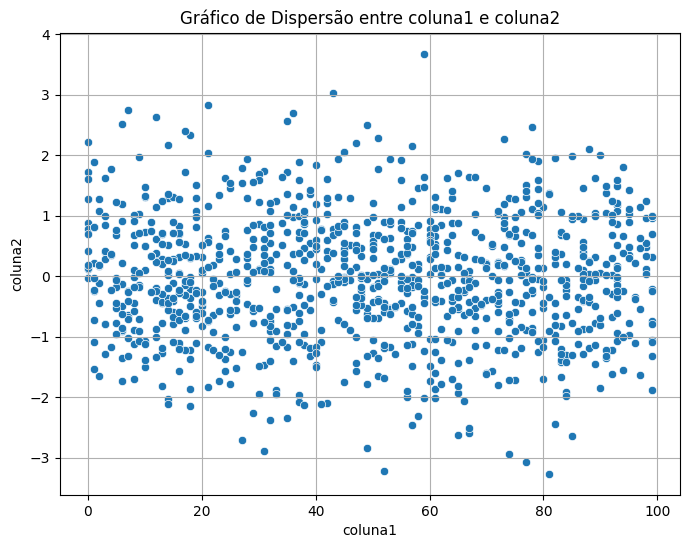

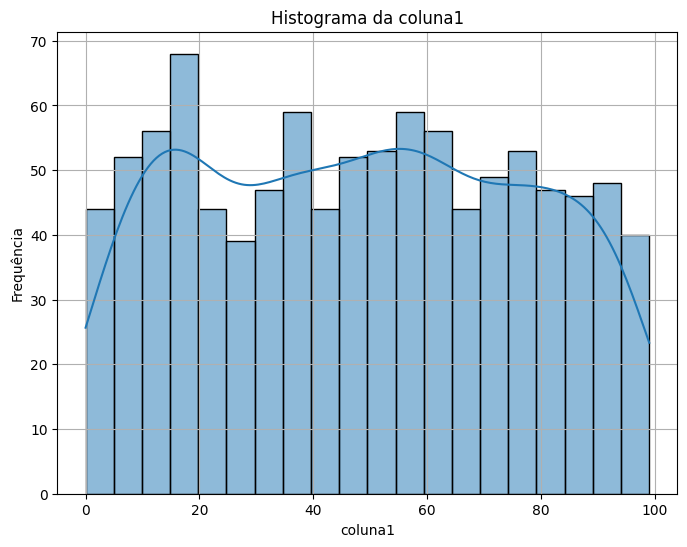

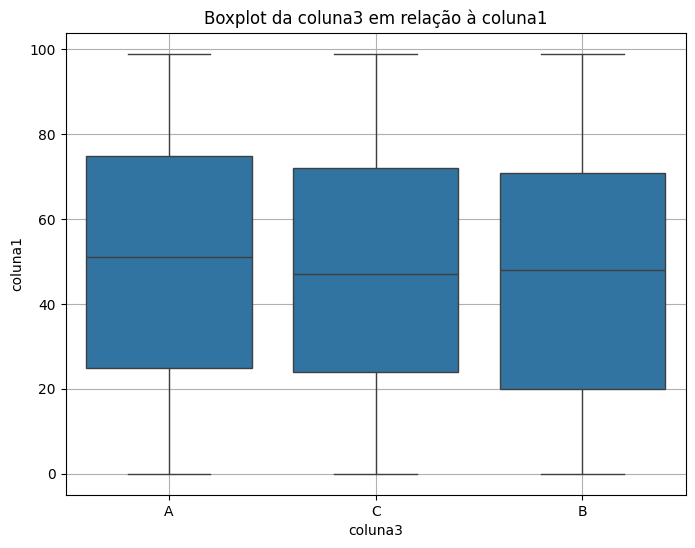

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Cria uma conexão com um banco de dados SQLite chamado 'data_lake.db' usando SQLAlchemy
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Exibe as primeiras linhas do DataFrame para uma inspeção inicial dos dados
print("Primeiras linhas do DataFrame:")
print(df.head())

# Exibe informações sobre o DataFrame, incluindo o tipo de dados de cada coluna e a presença de valores nulos
print("\nInformações sobre o DataFrame:")
print(df.info())

# Exibe um resumo estatístico das colunas numéricas do DataFrame, como média, desvio padrão, mínimos e máximos
print("\nResumo estatístico do DataFrame:")
print(df.describe())

# Cria um gráfico de dispersão entre duas colunas, 'coluna1' e 'coluna2', usando Seaborn para visualizar a relação entre elas
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Cria um histograma para a 'coluna1' com uma curva de densidade estimada (KDE) usando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Cria um boxplot para visualizar a distribuição da 'coluna1' agrupada por 'coluna3' usando Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação à coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()